In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import pandas as pd
import re
import json

In [2]:
judge_model_name = "Qwen/Qwen2.5-7B-Instruct"

tokenizer_judge = AutoTokenizer.from_pretrained(judge_model_name)

model_judge = AutoModelForCausalLM.from_pretrained(
    judge_model_name,
    torch_dtype=torch.float16,
    device_map="auto"
)

`torch_dtype` is deprecated! Use `dtype` instead!
2025-12-22 19:15:44.418339: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-22 19:15:44.464912: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-22 19:15:46.433615: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
# def create_judge_prompt(summary, predicted_rating):
#     prompt = (
#         "You are a Yelp rating coherence evaluator.\n"
#         "Your task is to judge whether the predicted rating matches the user's review summary.\n\n"
#         "You MUST respond STRICTLY in valid JSON format like this:\n"
#         "{\n"
#         "  \"coherence_score\": float between 0 and 1,\n"
#         "  \"verdict\": \"coherent\" or \"incoherent\",\n"
#         "  \"explanation\": \"short explanation\"\n"
#         "}\n\n"
#         f"Review Summary:\n{summary}\n\n"
#         f"Predicted Rating: {predicted_rating}\n\n"
#         "Return ONLY valid JSON. No extra text."
#     )
#     return prompt

In [ ]:
# # -------------------------------
# # 2. Fonction pour interroger le modèle
# # -------------------------------
# def ask_qwen_judge(prompt):
#     inputs = tokenizer_judge(prompt, return_tensors="pt").to(model_judge.device)

#     output = model_judge.generate(
#         **inputs,
#         max_new_tokens=200,
#         temperature=0.2,
#         do_sample=True
#     )

#     full_text = tokenizer_judge.decode(output[0], skip_special_tokens=True)
#     generated = full_text.replace(prompt, "").strip()
#     generated = generated.replace("```json", "").replace("```", "").strip()

#     try:
#         return json.loads(generated)
#     except:
#         return {
#             "coherence_score": 0.0,
#             "verdict": "unknown",
#             "explanation": "Model returned invalid JSON."
#         }

# # -------------------------------
# # 3. Charger les données
# # -------------------------------
# file_path = "/faststorage/project/DEIC-SDU-L2-22/llmproject/yelp/results_predictions_yelpwithouthis.json"
# df = pd.read_json(file_path)

# # -------------------------------
# # 4. Extraire review & évaluer
# # -------------------------------
# records = []

# for idx, prompt_text in enumerate(df['prompt']):
#     # Extraction plus robuste : tout ce qui suit "Review Text:" jusqu'à la fin ou saut de ligne
#     review_match = re.search(r'Review Text:\s*"(.*)"', prompt_text, re.DOTALL)
#     summary = review_match.group(1).strip() if review_match else None

#     if not summary:
#         # ignorer les lignes vides
#         continue

#     predicted_rating = df["predicted_label"].iloc[idx]

#     judge_prompt = create_judge_prompt(summary, predicted_rating)
#     judge_output = ask_qwen_judge(judge_prompt)

#     records.append({
#         "review": summary,
#         "predicted_rating": predicted_rating,
#         "coherence_score": judge_output["coherence_score"],
#         "verdict": judge_output["verdict"],
#         "explanation": judge_output["explanation"]
#     })

# # -------------------------------
# # 5. Sauvegarder résultats
# # -------------------------------
# results = pd.DataFrame(records)
# results.to_csv("llm_judge_json_output2_corrected.csv", index=False)

# print(results.head())

In [3]:
import pandas as pd

file_path = "/faststorage/project/DEIC-SDU-L2-22/llmproject/yelp/results_predictions_yelpwithouthis.json"
df = pd.read_json(file_path)
df.head()

,prompt,true_label,predicted_label
0,You are a rating prediction expert.\nBased on ...,5,5
1,You are a rating prediction expert.\nBased on ...,5,5
2,You are a rating prediction expert.\nBased on ...,5,5
3,You are a rating prediction expert.\nBased on ...,5,4
4,You are a rating prediction expert.\nBased on ...,5,5


In [4]:
print(df["prompt"].iloc[0])

You are a rating prediction expert.
Based on the following review text and user/business context, predict the rating (stars) the user will give.
Return only the rating as a single integer from 1 to 5, with no additional text.

Review Info:
- review_id=kcytuaMFAxiOl4k1cBeF2A
- user_id=--Vu3Gux9nPnLcG9yO_HxA
- business_id=gwGLBmNTfIlaTnwFtddbkQ

Review Text: "love their delicious selection of mini and jumbo muffins! they always have a seasonal flavor which is cool such as the pumpkin spice during fall time. they also have coffee and blended drinks if youre in the mood for something sweet!"

### Response:


In [1]:
# import pandas as pd

# df = pd.read_csv("llm_judge_json_output2_corrected.csv")
# df.head(50)


,review,predicted_rating,coherence_score,verdict,explanation
0,NaN,5,0.0,unknown,Model returned invalid JSON.
1,NaN,5,0.0,unknown,Model returned invalid JSON.
2,NaN,5,0.0,unknown,Model returned invalid JSON.
3,NaN,4,0.0,unknown,Model returned invalid JSON.
4,NaN,5,0.0,unknown,Model returned invalid JSON.
5,NaN,5,0.0,unknown,Model returned invalid JSON.
6,NaN,5,0.0,unknown,Model returned invalid JSON.
7,NaN,4,0.0,unknown,Model returned invalid JSON.
8,NaN,5,0.0,unknown,Model returned invalid JSON.
9,NaN,3,0.0,unknown,Model returned invalid JSON.


In [2]:
# coherence_rate = (df["verdict"] == "coherent").mean()
# coherence_rate

np.float64(0.0)

In [8]:
# import re
# import json
# import pandas as pd
# import torch

# # -------------------------------
# # 1. Créer le prompt pour le juge (Yelp, sans historique)
# # -------------------------------
# def create_judge_prompt(review_text, predicted_rating):
#     prompt = (
#         "You are a Yelp rating coherence evaluator.\n"
#         "Your task is to judge whether the predicted rating is coherent with "
#         "the given review text.\n\n"
#         "IMPORTANT RULES:\n"
#         "- Your ENTIRE response must be a valid JSON object\n"
#         "- Do NOT add any text before or after the JSON\n"
#         "- Do NOT use markdown or code fences\n\n"
#         "The JSON format MUST be exactly:\n"
#         "{\n"
#         "  \"coherence_score\": 0.0,\n"
#         "  \"verdict\": \"coherent\",\n"
#         "  \"explanation\": \"short explanation\"\n"
#         "}\n\n"
#         f"Review Text:\n{review_text}\n\n"
#         f"Predicted Rating: {predicted_rating}\n"
#     )
#     return prompt


# # -------------------------------
# # 2. Fonction pour interroger le modèle
# # -------------------------------
# def ask_qwen_judge(prompt):
#     inputs = tokenizer_judge(prompt, return_tensors="pt").to(model_judge.device)

#     output = model_judge.generate(
#         **inputs,
#         max_new_tokens=200,
#         temperature=0.2,
#         do_sample=True
#     )

#     full_text = tokenizer_judge.decode(output[0], skip_special_tokens=True)
#     generated = full_text.replace(prompt, "").strip()
#     generated = generated.replace("```json", "").replace("```", "").strip()

#     try:
#         result = json.loads(generated)
#     except:
#         result = {
#             "coherence_score": 0.0,
#             "verdict": "unknown",
#             "explanation": "Model returned invalid JSON."
#         }

#     # -------------------------------
#     # Normalisation du score + verdict
#     # -------------------------------
#     score = result.get("coherence_score", 0.0)
#     try:
#         score = float(score)
#         if score > 1.0:
#             score /= 5.0
#     except:
#         score = 0.0

#     if score >= 0.8:
#         verdict = "coherent"
#     elif score >= 0.5:
#         verdict = "partially coherent"
#     else:
#         verdict = "incoherent"

#     result["coherence_score"] = round(score, 2)
#     result["verdict"] = verdict

#     return result


In [9]:
# # -------------------------------
# # 3. Charger le dataset Yelp
# # -------------------------------
# file_path = "/faststorage/project/DEIC-SDU-L2-22/llmproject/yelp/results_predictions_yelpwithouthis.json"
# df = pd.read_json(file_path)

# #  TEST RAPIDE : seulement 10 exemples
# df_test = df.head(10)

# # -------------------------------
# # 4. Boucle d'évaluation
# # -------------------------------
# records = []

# for idx, prompt_text in enumerate(df_test["prompt"]):

#     # Extraction du Review Text (Yelp)
#     review_match = re.search(
#         r'Review Text:\s*"(.+?)"',
#         prompt_text,
#         re.DOTALL
#     )
#     review_text = review_match.group(1).strip() if review_match else ""

#     predicted_rating = df_test["predicted_label"].iloc[idx]

#     judge_prompt = create_judge_prompt(review_text, predicted_rating)
#     judge_output = ask_qwen_judge(judge_prompt)

#     records.append({
#         "review": review_text,
#         "predicted_rating": predicted_rating,
#         "coherence_score": judge_output["coherence_score"],
#         "verdict": judge_output["verdict"],
#         "explanation": judge_output["explanation"]
#     })

# # -------------------------------
# # 5. Sauvegarde & affichage
# # -------------------------------
# results = pd.DataFrame(records)
# results.to_json(
#     "llm_judge_yelp_test10.json",
#     orient="records",
#     indent=4,
#     force_ascii=False
# )

# print("===== SUMMARY TABLE (TEST 10) =====")
# print(results[["predicted_rating", "coherence_score", "verdict"]])
# print(f"Résultats sauvegardés dans llm_judge_yelp_test10.json ({len(results)} exemples)")


===== SUMMARY TABLE (TEST 10) =====
   predicted_rating  coherence_score             verdict
0                 5              1.0            coherent
1                 5              1.0            coherent
2                 5              1.0            coherent
3                 4              0.7  partially coherent
4                 5              1.0            coherent
5                 5              0.9            coherent
6                 5              1.0            coherent
7                 4              0.7  partially coherent
8                 5              1.0            coherent
9                 3              0.5  partially coherent
Résultats sauvegardés dans llm_judge_yelp_test10.json (10 exemples)


In [5]:
import re
import json
import pandas as pd
import torch

# -------------------------------
# 1. Créer le prompt pour le juge (Yelp, sans historique)
# -------------------------------
def create_judge_prompt(review_text, predicted_rating):
    prompt = (
        "You are a Yelp rating coherence evaluator.\n"
        "Your task is to judge whether the predicted rating is coherent with "
        "the given review text.\n\n"
        "IMPORTANT RULES:\n"
        "- Your ENTIRE response must be a valid JSON object\n"
        "- Do NOT add any text before or after the JSON\n"
        "- Do NOT use markdown or code fences\n\n"
        "The JSON format MUST be exactly:\n"
        "{\n"
        "  \"coherence_score\": 0.0,\n"
        "  \"verdict\": \"coherent\",\n"
        "  \"explanation\": \"short explanation\"\n"
        "}\n\n"
        f"Review Text:\n{review_text}\n\n"
        f"Predicted Rating: {predicted_rating}\n"
    )
    return prompt


# -------------------------------
# 2. Fonction pour interroger le modèle juge
# -------------------------------
def ask_qwen_judge(prompt):
    inputs = tokenizer_judge(prompt, return_tensors="pt").to(model_judge.device)

    with torch.no_grad():
        output = model_judge.generate(
            **inputs,
            max_new_tokens=200,
            temperature=0.2,
            do_sample=True
        )

    full_text = tokenizer_judge.decode(output[0], skip_special_tokens=True)
    generated = full_text.replace(prompt, "").strip()
    generated = generated.replace("```json", "").replace("```", "").strip()

    try:
        result = json.loads(generated)
    except:
        result = {
            "coherence_score": 0.0,
            "verdict": "unknown",
            "explanation": "Model returned invalid JSON."
        }

    # -------------------------------
    # Normalisation du score + verdict
    # -------------------------------
    score = result.get("coherence_score", 0.0)
    try:
        score = float(score)
        if score > 1.0:
            score /= 5.0
    except:
        score = 0.0

    if score >= 0.8:
        verdict = "coherent"
    elif score >= 0.5:
        verdict = "partially coherent"
    else:
        verdict = "incoherent"

    result["coherence_score"] = round(score, 2)
    result["verdict"] = verdict

    return result


In [ ]:
# -------------------------------
# 3. Charger TOUTE la dataset Yelp
# -------------------------------
file_path = "/faststorage/project/DEIC-SDU-L2-22/llmproject/yelp/results_predictions_yelpwithouthis.json"
df = pd.read_json(file_path)

print(f"Dataset chargée : {len(df)} exemples")


# -------------------------------
# 4. Boucle d'évaluation (TOUTE la dataset)
# -------------------------------
records = []

for idx, prompt_text in enumerate(df["prompt"]):

    # Extraction du Review Text (Yelp)
    review_match = re.search(
        r'Review Text:\s*"(.+?)"',
        prompt_text,
        re.DOTALL
    )
    review_text = review_match.group(1).strip() if review_match else ""

    predicted_rating = df["predicted_label"].iloc[idx]

    judge_prompt = create_judge_prompt(review_text, predicted_rating)
    judge_output = ask_qwen_judge(judge_prompt)

    records.append({
        "review": review_text,
        "predicted_rating": predicted_rating,
        "coherence_score": judge_output["coherence_score"],
        "verdict": judge_output["verdict"],
        "explanation": judge_output["explanation"]
    })

    # Affichage de la progression
    if (idx + 1) % 100 == 0:
        print(f"{idx + 1} reviews évaluées...")


# -------------------------------
# 5. Sauvegarde finale en JSON
# -------------------------------
results = pd.DataFrame(records)

results.to_json(
    "llm_judge_yelp_full.json",
    orient="records",
    indent=4,
    force_ascii=False
)

print("===== ÉVALUATION TERMINÉE =====")
print(results[["predicted_rating", "coherence_score", "verdict"]].value_counts())
print(f"Résultats sauvegardés dans llm_judge_yelp_full.json ({len(results)} exemples)")


Dataset chargée : 92745 exemples
100 reviews évaluées...
200 reviews évaluées...


In [1]:
!nvidia-smi

Wed Dec 24 00:16:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L40S                    Off |   00000000:02:00.0 Off |                    0 |
| N/A   30C    P0             78W /  350W |   42202MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import pandas as pd

file_path = "llm_judge_yelp_full.json"
df = pd.read_json(file_path)

print("Head of the dataset:")
print(df.head())

verdict_percentages = (
    df["verdict"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

print("\nVerdict percentage distribution:")
print(verdict_percentages)


Head of the dataset:
                                              review  predicted_rating  \
0  love their delicious selection of mini and jum...                 5   
1  such a huge selection of wonderful tasting tea...                 5   
2  the ribs have a sweet and smoky flavor and the...                 5   
3  i must say i love the peppermill casino! cafe ...                 4   
4  lobster mac cheese was phenomenal. the clam ch...                 5   

   coherence_score             verdict  \
0             1.00            coherent   
1             1.00            coherent   
2             1.00            coherent   
3             0.76  partially coherent   
4             1.00            coherent   

                                         explanation  
0  The review is positive and the rating of 5 is ...  
1  The review is positive and the rating of 5 is ...  
2  The review is positive and mentions several go...  
3  The review is positive and the rating of 4 sta...  
4     

              Verdict  Percentage
0            coherent       76.55
1  partially coherent       21.14
2          incoherent        2.32


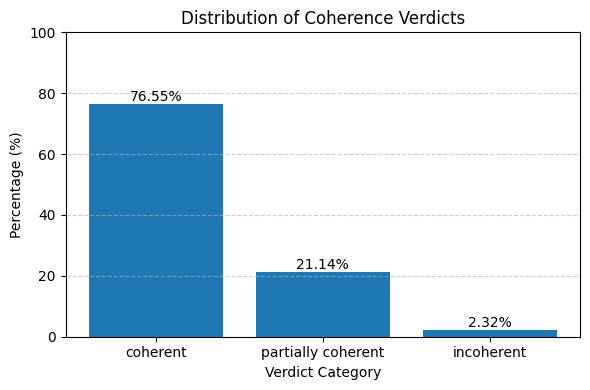

In [3]:
import matplotlib.pyplot as plt
verdict_percentages = (
    df["verdict"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
)

verdict_percentages.columns = ["Verdict", "Percentage"]

# Display table
print(verdict_percentages)

plt.figure(figsize=(6, 4))
plt.bar(
    verdict_percentages["Verdict"],
    verdict_percentages["Percentage"]
)

plt.ylabel("Percentage (%)")
plt.xlabel("Verdict Category")
plt.title("Distribution of Coherence Verdicts")
plt.ylim(0, 100)

for i, value in enumerate(verdict_percentages["Percentage"]):
    plt.text(i, value + 1, f"{value}%", ha="center", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("verdict_distribution_bar.png", dpi=300)
plt.show()


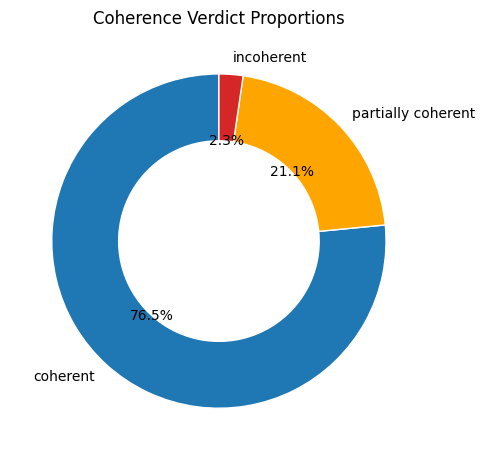

In [4]:
import matplotlib.pyplot as plt

# Ensure consistent ordering
order = ["coherent", "partially coherent", "incoherent"]

# Reorder dataframe safely
verdict_df = (
    verdict_percentages
    .set_index("Verdict")
    .reindex(order)
    .dropna()
)

# Define colors
color_map = {
    "coherent": "tab:blue",              # green
    "partially coherent": "orange",    # grey
    "incoherent": "#d62728"             # red
}

colors = [color_map[v] for v in verdict_df.index]

# Plot donut chart
plt.figure(figsize=(5, 5))
plt.pie(
    verdict_df["Percentage"],
    labels=verdict_df.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor="white")
)

plt.title("Coherence Verdict Proportions")
plt.tight_layout()
plt.savefig("verdict_distribution_donut_colored.png", dpi=300)
plt.show()
